In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# visualising data

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


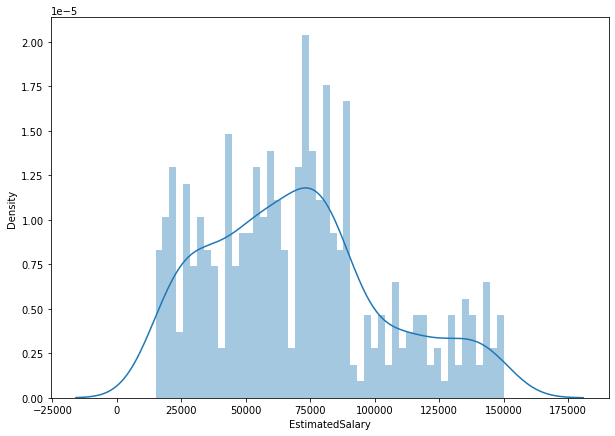

In [5]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.distplot(dataset['EstimatedSalary'],kde=True,bins=50)

Text(0.5, 0, 'Purchased')

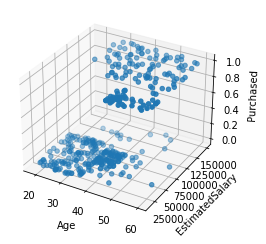

In [6]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
z = np.linspace(0, 15, 400)
zdata = 1 * np.random.random(400)
ax.scatter3D(dataset['Age'], dataset['EstimatedSalary'], dataset['Purchased'],cmap = 'Blues')
ax.set_xlabel('Age', fontsize= 10)
ax.set_ylabel("EstimatedSalary", fontsize=10)
ax.set_zlabel("Purchased", fontsize=10)

# feature selection

In [7]:
# choosing useful features
x=dataset.iloc[:,[0,1]].values
y=dataset.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [9]:
# y_test=np.array(y_test)
y_test=y_test.reshape((-1))
y_train=y_train.reshape((-1))

# Defining model 

## prior_probability

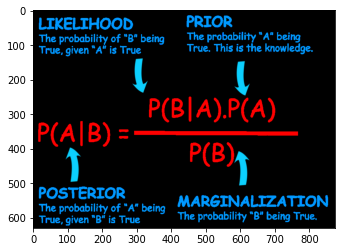

In [10]:
import cv2
img=cv2.imread('img.png')
plt.imshow(img)

In [11]:
def prior_prob(y,label):
  # count the example having the class same as label
  denominator=y.shape[0] #total outcome
  numerator=np.sum(y==label)
  return numerator/float(denominator)

In [12]:
def conditional_probability(x,y,x_feature_column,label,feature_value):
    # choosing specific filtered value P(feature_val=something|label=3)
     domain=x[y==label] # all rows with label as 3
     numerator=np.sum(domain[:,x_feature_column]==feature_value) # sum of those having feature value same as desired
     denominator=np.sum(y_train==label)# sum of total rows in domain
     return numerator/float(denominator) 

In [13]:
# posterior probabilty calculator
label=np.unique(y_train)
def posterior_prob(x,y,x_test):
    # x_test is a single testing point with n-features
    classes=np.unique(y)
    likelihood_lst=[]
    posterior_lst=[] # list of prob of all classes, given a single testing point 
    for  label in classes:
        feature_likelihood=[] # for collecting how likelihood changes for each feature
        final_likelihood=1.0
        for i in range(x.shape[1]): # i is the number of features
            likelihood_=conditional_probability(x=x_train,y=y_train,x_feature_column=i,feature_value=x_test[i],label=label)
            final_likelihood *= likelihood_
            feature_likelihood.append(final_likelihood)
        likelihood_lst.append(feature_likelihood)
        prior=prior_prob(y_train,label)
        # calculating the posterior probability
        post_p=final_likelihood*prior
        posterior_lst.append(post_p)
    predict=np.argmax(posterior_lst)
    return predict,likelihood_lst,posterior_lst


In [14]:
y_pred = []
likelihood_lst=[]
posterior_lst=[]
for i in range(x_test.shape[0]):
    output= posterior_prob(x_train,y_train,x_test[i])
    likelihood_lst.append(output[1][0])
    posterior_lst.append(output[1][1])
    y_pred.append(output[0])
output[1]
print(y_pred)
y_pred=np.array(y_pred)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]


In [15]:
type(y_pred)

numpy.ndarray

In [16]:
likelihood_lst

[[0.03015075376884422, 0.000151511325471579],
 [0.05527638190954774, 0.0008333122900936845],
 [0.11055276381909548, 0.0038887906871038613],
 [0.03015075376884422, 0.0009090679528294739],
 [0.11055276381909548, 0.001666624580187369],
 [0.02512562814070352, 0.0],
 [0.04020100502512563, 0.000606045301886316],
 [0.035175879396984924, 0.0],
 [0.010050251256281407, 0.000101007550314386],
 [0.005025125628140704, 0.00012625943789298252],
 [0.03015075376884422, 0.000151511325471579],
 [0.04522613065326633, 0.0011363349410368425],
 [0.04020100502512563, 0.0010100755031438602],
 [0.04020100502512563, 0.0],
 [0.03015075376884422, 0.000303022650943158],
 [0.005025125628140704, 0.0],
 [0.04020100502512563, 0.0],
 [0.020100502512562814, 0.000101007550314386],
 [0.0, 0.0],
 [0.11055276381909548, 0.001111083053458246],
 [0.11055276381909548, 0.001111083053458246],
 [0.005025125628140704, 0.0],
 [0.06532663316582915, 0.000656549077043509],
 [0.005025125628140704, 0.0],
 [0.020100502512562814, 0.00020201

In [17]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
np.sum(y_test==1)

22

In [19]:
def accuracy(y_pred,y_test):
    numerator=np.sum(y_pred==y_test)
    denominator=y_pred.shape[0]

    return (numerator/float(denominator))*100
accuracy=accuracy(y_pred=y_pred,y_test=y_test)
accuracy


85.0

<AxesSubplot:>

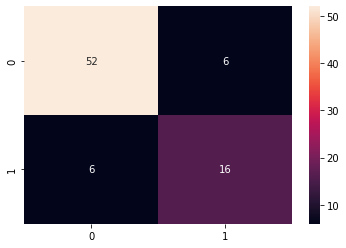

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

In [22]:
posterior_lst=np.array(posterior_lst)
likelihood_lst=np.array(likelihood_lst)

In [33]:
posterior_lst[0]

array([0.01652893, 0.0001366 ])

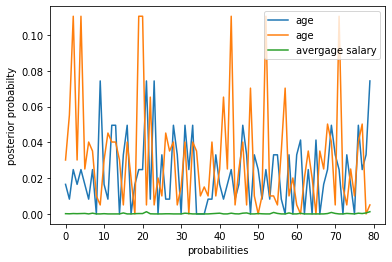

In [60]:
plt.plot(posterior_lst[:,0],label='age')

plt.plot(posterior_lst[:,1],label='avergage salary')
plt.xlabel("probabilities")
plt.ylabel("posterior probabilty")
plt.legend()
plt.show()

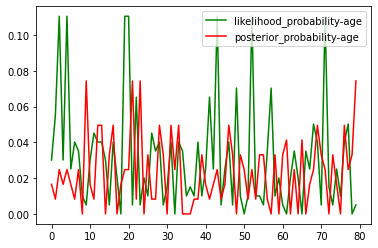

In [106]:
plt.plot(likelihood_lst[:,0],label='likelihood_probability-age',c='green')
plt.plot(posterior_lst[:,0],label='posterior_probability-age',c='r')
plt.legend()
plt.show()

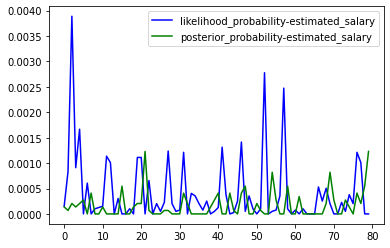

In [72]:
plt.plot(likelihood_lst[:,1],label='likelihood_probability-estimated_salary',c='blue')
plt.plot(posterior_lst[:,1],label='posterior_probability-estimated_salary',c='green')
plt.legend()
plt.show()

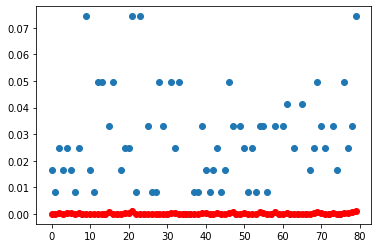

In [55]:
a=np.arange(0,80) 
plt.scatter(a,posterior_lst[:,0]) # age 
plt.xlabel("no_of_iteration")
plt.ylabel("posterior_prob_of each feature")
plt.scatter(a,posterior_lst[:,1],c='r') # estimated salary

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3552\289877304.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes=graph.gca(projection='3d')


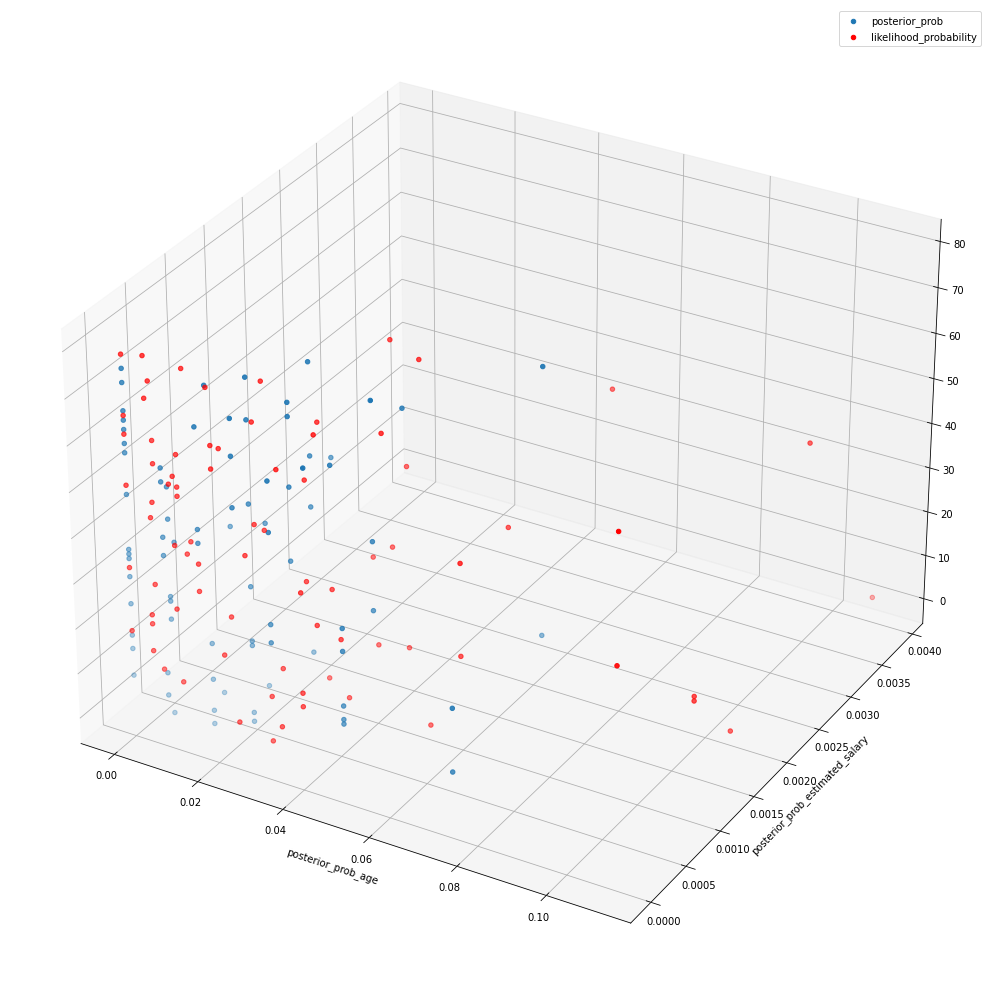

In [103]:
graph=plt.figure(figsize=(18,18))
axes=graph.gca(projection='3d')

axes.scatter(posterior_lst[:,0],posterior_lst[:,1],a,label="posterior_prob")
axes.scatter(likelihood_lst[:,0],likelihood_lst[:,1],a,c='r',label="likelihood_probability")
plt.xlabel("posterior_prob_age")
plt.ylabel("posterior_prob_estimated_salary")
# z axis contain the iteration
plt.legend()
plt.show()
